In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import numpy as np

from neutrons.process.data_processor import TotalProcessor, AbsorptionProcessor


H_data_a = pd.read_csv('../data/h_cross_a.txt',sep=r'\s+')
H_data_t = pd.read_csv('../data/h_cross_t.txt',sep=r'\s+')
H_data_s = pd.read_csv('../data/h_cross_s.txt',sep=r'\s+')

O_data_a = pd.read_csv('../data/o_cross_a.txt',sep=r'\s+')
O_data_t = pd.read_csv('../data/o_cross_t.txt',sep=r'\s+')
O_data_s = pd.read_csv('../data/o_cross_s.txt',sep=r'\s+')

In [27]:
processor = TotalProcessor([H_data_t, O_data_t])
f = processor.interpolaters[0]

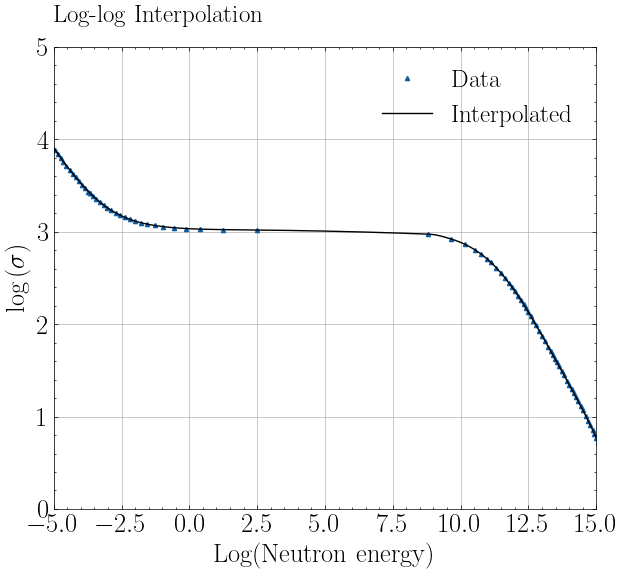

In [28]:
xp = H_data_t["energy(eV)"].values
fp = H_data_t["sigma_t(b)"].values

x_log = np.log(xp)
y_log = np.log(fp)

x_interp = np.linspace(min(x_log), max(x_log), 10000)
y_interp = f(x_interp)

plt.figure(figsize=(7, 6))
plt.plot(x_log, y_log, '^',markersize = 3, label="Data")
plt.plot(x_interp, y_interp, 'k-', label="Interpolated")
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Log(Neutron energy)', fontsize=19)
plt.ylabel(r'$\log{(\sigma)}$', fontsize=19)
plt.legend(fontsize=18)
plt.title('Log-log Interpolation', fontsize=18, pad=18, loc = 'left')
plt.xlim(-5, 15)
plt.ylim(0, 5)
plt.grid(True)
plt.show()

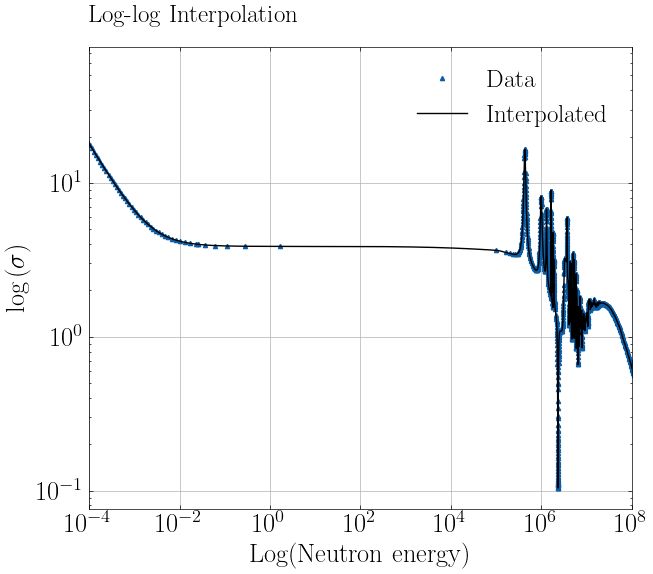

In [29]:
xp = O_data_t["energy(eV)"].values
fp = O_data_t["sigma_t(b)"].values

x_log = np.log(xp)
y_log = np.log(fp)

f = processor.interpolaters[1]
x_interp = np.linspace(min(x_log), max(x_log), 10000000)
y_interp_log = f(x_interp)
y_interp = np.exp(y_interp_log)

plt.figure(figsize=(7, 6))
plt.loglog(xp, fp, '^', markersize=3, label="Data")
plt.loglog(np.exp(x_interp), y_interp, 'k-', label="Interpolated")
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Log(Neutron energy)', fontsize=19)
plt.ylabel(r'$\log{(\sigma)}$', fontsize=19)
plt.xlim(10**-4, 10**8)
plt.legend(fontsize=18)
plt.title('Log-log Interpolation', fontsize=18, pad=18, loc = 'left')
plt.grid(True)
plt.show()

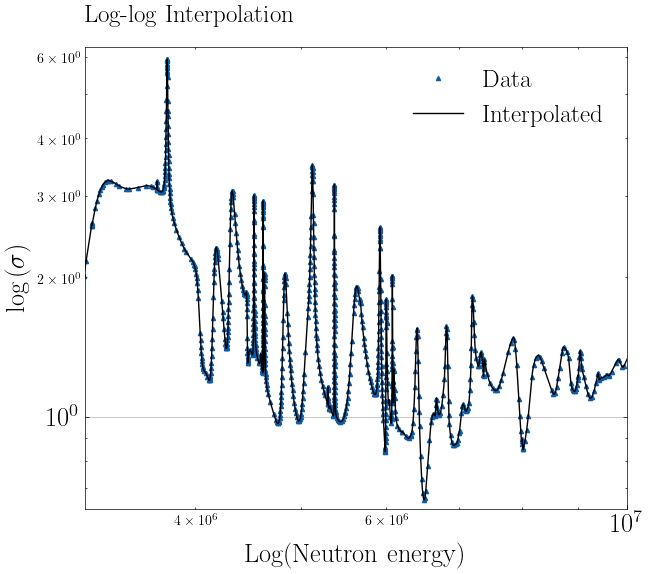

In [30]:
plt.figure(figsize=(7, 6))
plt.loglog(xp, fp, '^', markersize=3, label="Data")
plt.loglog(np.exp(x_interp), y_interp, 'k-', label="Interpolated")
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Log(Neutron energy)', fontsize=19)
plt.ylabel(r'$\log{(\sigma)}$', fontsize=19)
plt.legend(fontsize=18)
plt.xlim(10**6.5, 10**7)
plt.ylim(10**-0.2, 10**0.8)
plt.title('Log-log Interpolation', fontsize=18, pad=18, loc = 'left')
plt.grid(True)
plt.show()

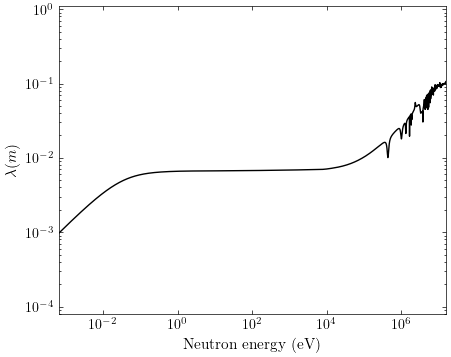

In [40]:
energies = np.logspace(-4, 8, 100000)
mfps=[processor.get_mfp(E) for E in energies]
plt.figure(figsize=(5, 4))
plt.loglog(energies, mfps, 'k-')
plt.xlim(10**-3.2, 10**7.2)
plt.ylim(10**-4.1, 1.1)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Neutron energy (eV)', fontsize=11)
plt.ylabel('$\lambda (m)$', fontsize=11)
#plt.title('Interpolated Mean Free Path of H2O', fontsize=18, pad=18, loc = 'left')
#plt.grid(True)
plt.show()

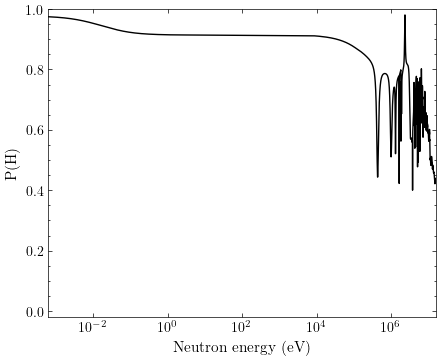

In [14]:
H_collision_probs = [processor.get_ratio(E) for E in energies]
plt.figure(figsize=(5, 4))
plt.plot(energies, H_collision_probs, linewidth=1, color="k")
plt.xlim(10**-3.2, 10**7.2)
plt.ylim(-0.02, 1)
plt.xscale('log')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Neutron energy (eV)', fontsize=11)
plt.ylabel('P(H)', fontsize=11)
#plt.title('Interpolated H-n interaction probability in H20', fontsize=18, pad=18, loc = 'left')
#plt.grid(True)
plt.show()

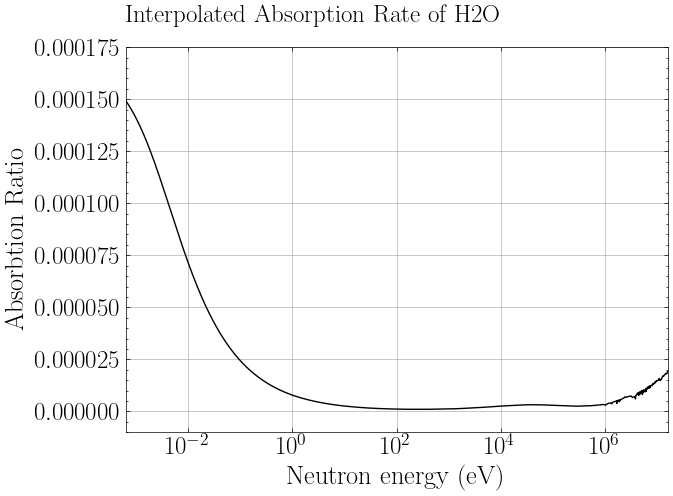

In [15]:
processor = AbsorptionProcessor([H_data_s, O_data_s], [H_data_a, O_data_a])
energies = np.logspace(-6, 10, 100000)
absorption_rates =[processor.get_total_absorption_rate(E) for E in energies]
plt.figure(figsize=(7, 5))
plt.plot(energies, absorption_rates, 'k-')
plt.xscale("log")
plt.xlim(10**-3.2, 10**7.2)
plt.ylim(-0.00001, 0.000175)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('Neutron energy (eV)', fontsize=19)
plt.ylabel('Absorbtion Ratio', fontsize=19)
plt.title('Interpolated Absorption Rate of H2O', fontsize=18, pad=18, loc = 'left')
plt.grid(True)
plt.show()

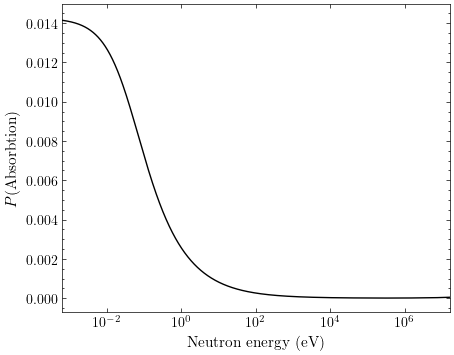

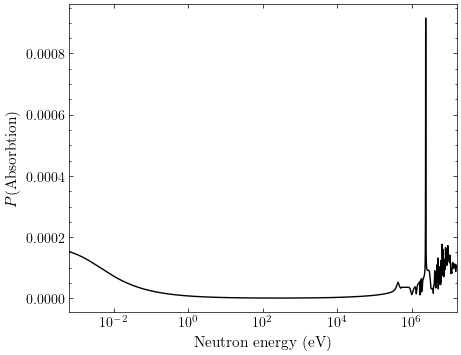

In [24]:
absorption_rates =[processor.get_absorption_rates(E) for E in energies]
absorption_rates_h, absorption_rates_o = zip(*absorption_rates)
plt.figure(figsize=(5, 4))
plt.plot(energies, absorption_rates_h, 'k-')
plt.xscale("log")
plt.xlim(10**-3.2, 10**7.2)
#plt.ylim(-0.0001, 0.0072)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Neutron energy (eV)', fontsize=11)
plt.ylabel('$P$(Absorbtion)', fontsize=11)
#plt.title('Interpolated Absorption Rate of H', fontsize=18, pad=18, loc = 'left')
#plt.grid(True)
plt.show()

plt.figure(figsize=(5, 4))
plt.plot(energies, absorption_rates_o, 'k-')
plt.xscale("log")
plt.xlim(10**-3.2, 10**7.2)
#plt.ylim(-0.0001, 0.0072)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Neutron energy (eV)', fontsize=11)
plt.ylabel('$P$(Absorbtion)', fontsize=11)
#plt.title('Interpolated Absorption Rate of O', fontsize=18, pad=18, loc = 'left')
#plt.grid(True)
plt.show()
